# ¿Qué determina si un videojuego tiene éxito o no?

In [1]:
# Carga las librerías que ocupaste
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st


In [2]:
# Carga el archivo
try:
    games = pd.read_csv("games.csv")
except:
    games = pd.read_csv("/datasets/games.csv")

In [3]:
# Imprime una descripción de los datos
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Imprime una muestra de los datos
print(games.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
# Revisa las distribuciones de las columnas númericas
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- Para evitar conflicto con los datos y nombres de las columnas, serán cambiados a minúsculas.
- La columna 'user_score' es de tipo 'object' investigaré más adelante.
Datos nulos.
- Las columnas 'name' y 'genre' contienen dos datos nulos, veamos si estos videojuegos tienen ventas considerablemente grandes.
- Para la columna 'year_of_release' considero que necesitaríamos extraer los datos o posiblemente sean videojuegos viejos que no cuentan o es complejo saber ese dato, trabajaré sin ellos, veamos si son imprescindibles.
- En las columnas 'critic_score'. 'user_score' y 'rating' considero que las calificaciónes de cada videojuego es abstracta, por lo que de igual manera trabajaré con los datos que tenemos solamente, veré si es alto el porcentaje de los datos nulos.

### Corrige los datos

In [6]:
# Cambia los nombres de las columnas a minúsculas para tener un mejor manejo de ellos.
games.columns = games.columns.str.lower()
# Cambia los nombres de la columna 'name' y 'platform' a minuscula
games['name'] = games.name.str.lower()
games['platform'] = games.platform.str.lower()
games['genre'] = games.genre.str.lower()

## Revisa las columnas que pudieran necesitar mayor investigación

In [7]:
# Crea una función que analice si un número dado en cadena es un flotante
def is_float(str):
    """
    Función que revisa si una cadena puede ser un número flotante.
    """
    # Intenta castear la cadena en número flotante.
    try:
        float(str)
        return True
    # Si nos arroja un error, la cadena no es un número.
    except ValueError:
        return False
# Crea una función que analice cada dato de una columna y nos devuelva los que no son numericos.
def data_isnot_numbers(scores):
    """
    Función que nos devolverá los datos de una columna que no sean números.
    """
    # Crea una lista para guardar los datos que no sean números.
    lista = []
    # Ciclo for para analizar cada dato de la columna.
    for score in scores:
        # Comprueba si el dato es un "string"
        if isinstance(score, str):
            # Llama a la función "is_float" para analizar si el dato es un número.
            if is_float(score):
                pass
            # Si no es un número, guarda ese dato.
            else:
                lista.append(score)
        # Si el dato no es un "string" analiza si es un dato nulo.
        else:
            # Si no es nulo, guarda el resultado.
            if not np.isnan(score):
                lista.append(score)
    # Elimina los duplicados de la lista.
    lista = pd.Series(lista).drop_duplicates()
    return list(lista)

In [8]:
# Revisa qué datos de la columna "user_score" no son números.
data_isnot_numbers(games['user_score'])

['tbd']

Tenemos el registro "tbd" en la columna "user_score", significa "To be determided". Teniendo en cuenta que una calificación para un videojuego depende del gusto para los usuarios (en este caso), esos registros los cambiaremos por "nan".

In [9]:
# Cambia los registros con "tbd" a valores nulos.
games = games.replace({'user_score':'tbd'}, {'user_score':np.nan})
# Cambia el tipo de datos a "float64"
games['user_score'] = games['user_score'].astype('float64')

### Revisa los videojuegos que no tienen nombre y género.

In [40]:
# Imprime los videojuegos que no tienen nombre.
print(games.query('name.isna()'))

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      gen           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  tot_income  
659           0.08           NaN         NaN    NaN        2.39  
14244         0.00           NaN         NaN    NaN        0.03  


Posiblemente no necesitemos estos dos videojuegos que tenemos con nombre nulo y género, ya que son de un año "viejo".
Pero ya que uno de ellos tiene ventas altas, veamos más adelante si es necesario considerarlo.

### Veamos si tenemos duplicados.

In [10]:
# Revisa si tenemos duplicados
games[games.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,gen,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,madden nfl 13,ps3,2012.0,sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [11]:
# Investiga el juego 'madden nfl 13' de la plataforma 'ps3'
games.query('name == "madden nfl 13" and platform == "ps3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,madden nfl 13,ps3,2012.0,sports,0.00,0.01,0.0,0.00,83.0,5.5,E


- En el caso del videojuego 'madden nfl 13' parece ser que tenemos un duplicado, al ser sólo un duplicado, vamos a eliminar el registro '16230' y sumar '0.01' a las ventas de 'eu_sales'.
- El videojuego que no cuenta con 'name' y 'genre' ya lo tratamos anteriormente.


In [13]:
# Agrega '0.01' a 'eu_sales' del videojuego '604'
games.loc[604, 'eu_sales'] +=0.01
# Elimina el registro '16230'
games.drop(16230, inplace=True)
# Resetea el index
games.reset_index(drop=True, inplace=True)

### Enriquece los datos


In [14]:
# Creemos una columna que contenga la suma de los ingresos de todas las regiones para cada videojuego
games['tot_income'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales

### Revisa ¿Cuántos videojuegos se lanzaron cada año

In [15]:
# Cuenta el número de videojuegos que se lanzaron cada año.
games.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     652
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: name, dtype: int64

## Revisemos ¿Cuánto ha vendido cada plataforma? 

In [16]:
# Agrupa por la columna 'platform' y suma los totales de ventas de todos los videojuegos
print(games.groupby('platform')['tot_income'].sum().sort_values(ascending=False))

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
3ds      259.00
xb       257.74
gb       255.46
nes      251.05
n64      218.68
snes     200.04
gc       198.93
xone     159.32
2600      96.98
wiiu      82.19
psv       54.07
sat       33.59
gen       30.77
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: tot_income, dtype: float64


## Con los datos anteriores, revisa cómo se comportaron las ventas de las plataformas con mayores ganancias cada año.

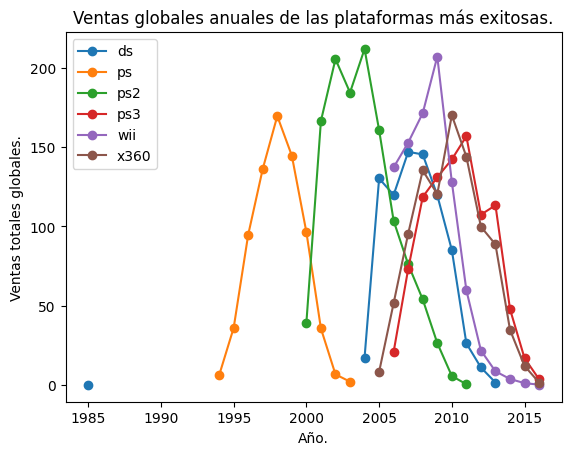

In [41]:
# Crea una variable con una 'pivot_table' que contenga las ventas anuales de cada plataforma
year_solds = games.query('platform == ["ps2", "x360", "ps3", "wii", "ds", "ps"]').pivot_table(index='year_of_release', columns='platform', values='tot_income', aggfunc='sum')
# Crea un 'lineplot'
plt.plot(year_solds, 'o-')
plt.title('Ventas globales anuales de las plataformas más exitosas.')
plt.ylabel('Ventas totales globales.')
plt.xlabel('Año.')
plt.legend(year_solds.columns)
plt.show()

In [18]:
# Imprime la 'pivot_table' para revisar las ventas.
print(year_solds)

platform             ds      ps     ps2     ps3     wii    x360
year_of_release                                                
1985.0             0.02     NaN     NaN     NaN     NaN     NaN
1994.0              NaN    6.03     NaN     NaN     NaN     NaN
1995.0              NaN   35.96     NaN     NaN     NaN     NaN
1996.0              NaN   94.70     NaN     NaN     NaN     NaN
1997.0              NaN  136.17     NaN     NaN     NaN     NaN
1998.0              NaN  169.49     NaN     NaN     NaN     NaN
1999.0              NaN  144.53     NaN     NaN     NaN     NaN
2000.0              NaN   96.37   39.17     NaN     NaN     NaN
2001.0              NaN   35.59  166.43     NaN     NaN     NaN
2002.0              NaN    6.67  205.38     NaN     NaN     NaN
2003.0              NaN    2.07  184.31     NaN     NaN     NaN
2004.0            17.27     NaN  211.81     NaN     NaN     NaN
2005.0           130.14     NaN  160.66     NaN     NaN    8.25
2006.0           119.81     NaN  103.42 

- Conservemos solamente los datos a partir del año 1994, pues en la plataforma 'ds' hay videojuegos que parecen tener información érronea.

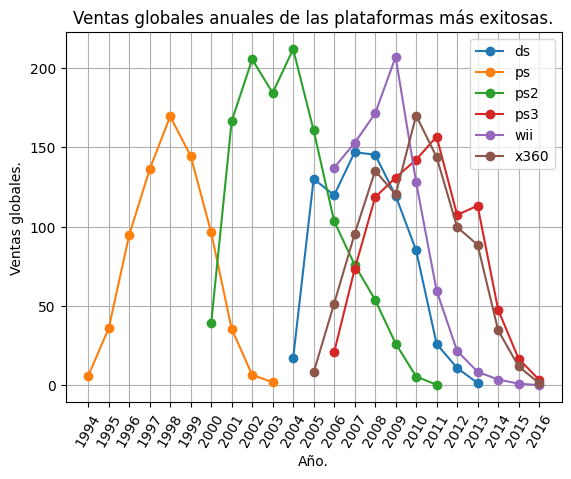

In [19]:
# Filtra las ventas globales de las plataformas más exitosas a partir de 1994.
year_solds = games.query('year_of_release >= 1994 and platform == ["ps2", "x360", "ps3", "wii", "ds", "ps"]').pivot_table(index='year_of_release', columns='platform', values='tot_income', aggfunc='sum')
# Crea un 'lineplot'
plt.plot(year_solds, 'o-')
plt.title('Ventas globales anuales de las plataformas más exitosas.')
plt.ylabel('Ventas globales.')
plt.xlabel('Año.')
plt.xticks(range(1994, 2017), rotation=60)
plt.grid()
plt.legend(year_solds.columns)
plt.show()

La gráfica anterior da una idea sobre cuánto tarda una consola en aparecer y posicionarse en el mercado, así también cuánto dura en el mercado (en la gráfica vemos que 6 años es el comienzo de cambio de generación de las consolas de 'PlayStation').

### Revisar diagramas de caja para comparar las ventas de cada plataforma.

Conservemos las plataformas exitosas a partir de 2004, periodo dónde se presentan varias plataformas compitiendo, analicemoslas.

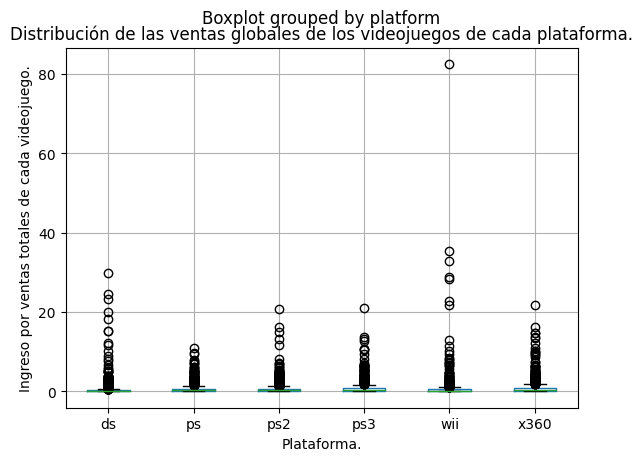

In [44]:
# Filtra los videojuegos a partir de 2004 y conserva sólo las plataformas más éxitosas.
games_leaders = games.query('year_of_release >= 1994 and platform in ["ps2", "x360", "ps3", "wii", "ds", "ps"]')
# Crea un diagrama de caja que muestre las ventas globales de cada plataforma.
games_leaders[['tot_income', 'platform']].boxplot(by='platform')
plt.title('Distribución de las ventas globales de los videojuegos de cada plataforma.')
plt.ylabel('Ingreso por ventas totales de cada videojuego.')
plt.xlabel('Plataforma.')
plt.show()

Se presentan algunos videojuegos con ventas muy por encima del resto (videojuegos muy éxitosos), filtremos las ventas anómalas para visualizar de mejor manera la distribución de las ventas de cada plataforma.

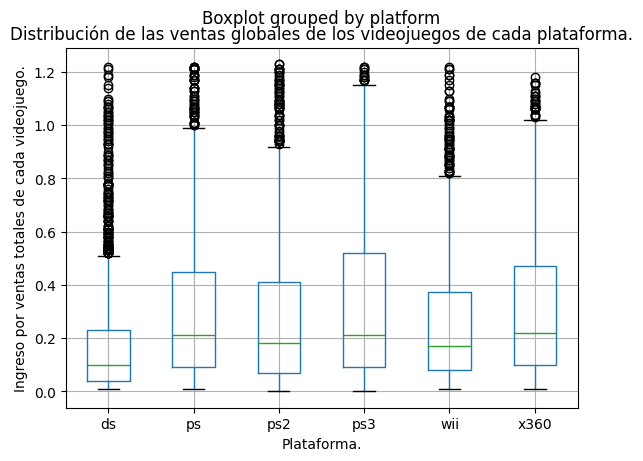

In [21]:
# Determina el nivel superior de las ventas globales anomalas.
Q1 = games_leaders['tot_income'].quantile(0.25)
Q3 = games_leaders['tot_income'].quantile(0.75)
IQR = Q3 - Q1
upper_level = Q3 + (1.5 * IQR)
# Crea un diagrama de caja que muestre las ventas globales de cada plataforma.
games_leaders.query('tot_income < @upper_level')[['tot_income', 'platform']].boxplot(by='platform')
plt.title('Distribución de las ventas globales de los videojuegos de cada plataforma.')
plt.ylabel('Ingreso por ventas totales de cada videojuego.')
plt.xlabel('Plataforma.')
plt.show()

Vemos que los datos tienen una asimetría positiva (datos sesgados a la derecha) y la mediana de la mayoría de plataformas es bastante similar, lo que indica que el 50% de los videojuegos de cada plataforma vende cifras similares, por lo tanto, las plataformas exitosas, tienen más cantidad de videojuegos o contienen videojuegos que venden una cantidad bastante más grande que sus competidores.

### Revisemos cómo afectan las reseñas de los usuarios y de los profesionales a las ventas de los videojuegos de x360 (plataforma éxitosa en el periodo en que varias plataformas compitieron en ventas).

In [22]:
# Guarda los videojuegos de la plataforma 'x360' en una variable.
x360_games = games_leaders.query('platform == "x360"')
# Muestra una matriz de correlación entre las ventas de las diferentes zonas de la plataforma 'ps2' y las criticas de los profesionales y de los usuarios.
x360_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
na_sales,1.000000,0.854828,0.486123,0.964488,0.376655,0.107545
eu_sales,0.854828,1.000000,0.461634,0.947864,0.385040,0.108751
jp_sales,0.486123,0.461634,1.000000,0.501547,0.284267,0.183939
other_sales,0.964488,0.947864,0.501547,1.000000,0.401812,0.122477
critic_score,0.376655,0.385040,0.284267,0.401812,1.000000,0.625020
user_score,0.107545,0.108751,0.183939,0.122477,0.625020,1.000000


Veamos si las calificaciones nulas afectan considerablemente a la correlación.

In [23]:
# Muestra una matriz de correlación para la plataforma 'x360' sin las calificaciónes de los profesionales que están nulas.
x360_games.query('~critic_score.isna()')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']].corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score
na_sales,1.000000,0.867751,0.519047,0.967045,0.376655
eu_sales,0.867751,1.000000,0.499559,0.953384,0.385040
jp_sales,0.519047,0.499559,1.000000,0.537972,0.284267
other_sales,0.967045,0.953384,0.537972,1.000000,0.401812
critic_score,0.376655,0.385040,0.284267,0.401812,1.000000


In [24]:
# Muestra una matriz de correlación para la plataforma 'ps2' sin las calificaciónes de los usuarios que están nulas.
x360_games.query('~user_score.isna()')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'user_score']].corr()

,na_sales,eu_sales,jp_sales,other_sales,user_score
na_sales,1.000000,0.862023,0.518600,0.967229,0.107545
eu_sales,0.862023,1.000000,0.495650,0.948726,0.108751
jp_sales,0.518600,0.495650,1.000000,0.536732,0.183939
other_sales,0.967229,0.948726,0.536732,1.000000,0.122477
user_score,0.107545,0.108751,0.183939,0.122477,1.000000


Las calificaciones nulas no afectan considerablemente por lo tanto podemos confiar en la correlación con datos nulos en las calificaciónes.

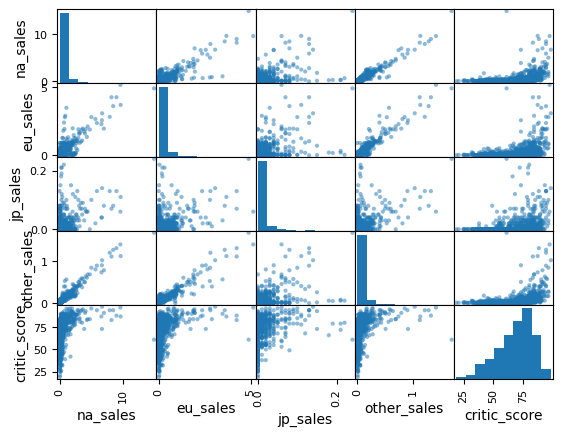

In [26]:
# Traza una matriz de dispersión para la plataforma 'x360' y las ventas de las diferentes zonas, contra la critica de los profesionales.
pd.plotting.scatter_matrix(x360_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']])
plt.show()

No vemos una correlación que sea linealmente fuerte, sin embargo, en la matriz de dispersión observamos que hay una acumulación de videojuegos cuándo las calificaciónes van siendo más altas e incluso vemos algunos videojuegos que se venden bastante mejor que el resto y sólo se observan en el rango 50 a 75 de calificación, por lo que podríamos resumir que las calificaciónes de los profesionales si afectan a las ventas.

### Veamos cómo son las ventas de los mismos videojuegos de la plataforma 'x360' que se venden también en otras plataformas.

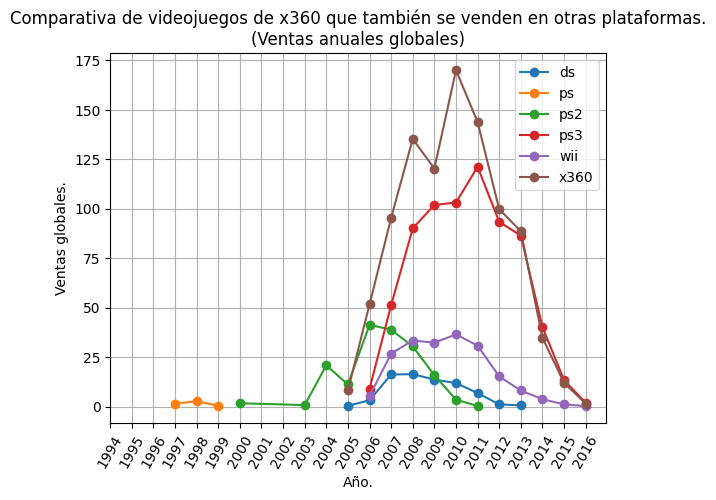

In [27]:
# ps3_samex360_games = games.query('platform == "ps3" and name in @x360_games["name"]')
samex360_games = games_leaders.query('name in @x360_games.name')
# Crea un gráfico que muestre las ventas de los mismos videojuegos en otras plataformas.
games_comparation = samex360_games.pivot_table(index='year_of_release', columns='platform', values='tot_income', aggfunc='sum')
plt.plot(games_comparation, 'o-')
plt.title("""Comparativa de videojuegos de x360 que también se venden en otras plataformas.
(Ventas anuales globales)""")
plt.ylabel('Ventas globales.')
plt.xlabel('Año.')
plt.xticks(range(1994, 2017), rotation=60)
plt.grid()
plt.legend(games_comparation.columns)
plt.show()

Se observa que el principal competidor fue la plataforma 'ps2', cabe destacar que en otras plataformas también hay videojuegos que no se venden en 'x360', teniendo eso en cuenta, la plataforma 'ps2' estuvo muy cerca de 'x360' en ventas de los mismos videojuegos.

### Estuvimos investigando cómo fueron las ventas de las plataformas éxitosas, pero, ¿Qué género de videojuegos son los más rentables?

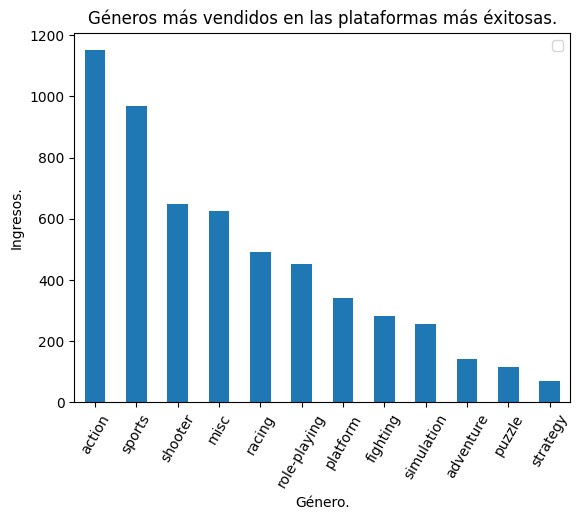

In [28]:
# Consulta qué géneros fueron los más rentables dentro de las plataformas más exitosas.
games_leaders.pivot_table(index='genre', values='tot_income', aggfunc='sum').sort_values(by='tot_income', ascending=False).plot(kind='bar')
# Crea un 'barplot'
plt.title('Géneros más vendidos en las plataformas más éxitosas.')
plt.legend('')
plt.xlabel('Género.')
plt.ylabel('Ingresos.')
plt.xticks(rotation=60)
plt.show()

Tenemos 2 géneros que son los más vendidos (acción y deportes) y al parecer es mala idea poner gran atención a desarrollar juegos de tipo aventura, rompecabezas o de estrategia, sin embargo, tenemos que considerar que así cómo vimos que hay videojuegos que "jalan" las ventas, aquí pudieramos tener la misma situación.

### Hasta ahora he investigado qué plataformas, videojuegos y géneros son los más vendidos globalmente, pero, esto debería variar dependiendo la región, veamos si esto es cierto.

In [29]:
# Creación de función
def pivott_sorted(df, index, value, aggfunc):
    """
        Función que crea una 'pivot_table' y la ordena de mayor a menor
    """
    pivott = df.pivot_table(index=index, values=value, aggfunc=aggfunc).sort_values(by=value, ascending=False).head()
    return pivott

In [45]:
# Muestra las 5 principales plataformas para las régiones de 'na', 'eu' y 'jp'.
for value in ['na_sales', 'eu_sales', 'jp_sales']:
    print(pivott_sorted(games_leaders, 'platform', value, 'sum'))

          na_sales
platform          
x360        595.74
ps2         572.92
wii         486.87
ps3         390.13
ds          380.31
          eu_sales
platform          
ps2         332.63
ps3         327.21
x360        268.32
wii         258.32
ps          212.39
          jp_sales
platform          
ds          175.00
ps          139.78
ps2         137.54
ps3          79.41
wii          68.28


Los 'top5' de cada región tiene similares plataformas éxitosas, pero en distinto orden, podemos observar que cada platforma podría tener una influencia por 'localidad' observamos que por ejemplo la plataforma 'x360' se vende mejor en la región de 'na' que en 'eu' y 'jp'.

Situación similar se observa en la región de 'jp' que tiene ventas mayores en las plataformas 'ps' e incluso la plataforma 'x360' no aparece en el 'top5'.

### Veamos ahora los principales géneros en las distintas regiones.

In [31]:
# Muestra las 5 principales plataformas para las régiones de 'na', 'eu' y 'jp'.
for value in ['na_sales', 'eu_sales', 'jp_sales']:
    print(pivott_sorted(games_leaders, 'genre', value, 'sum'))

         na_sales
genre            
action     577.57
sports     504.43
shooter    357.47
misc       313.84
racing     233.97
         eu_sales
genre            
action     348.23
sports     281.53
shooter    200.41
misc       176.36
racing     168.01
              jp_sales
genre                 
role-playing    153.12
action           86.34
sports           75.33
misc             69.16
fighting         40.63


En el caso de los genéros, vemos que son bastante similares de una región a otra y también explica porqué a nivel global los géneros 'action', 'sports' y 'shooter', son los géneros más vendidos, pues se repiten en estas 3 regiones (con excepcion de 'jp' que no vemos 'shooter' en su top 5).

#### Veamos si en el caso de cada región, las calificaciones de los profesionales afectan a las ventas.

In [47]:
games_leaders[['na_sales', 'eu_sales', 'jp_sales', 'critic_score', 'user_score']].corr()

,na_sales,eu_sales,jp_sales,critic_score,user_score
na_sales,1.000000,0.864932,0.425785,0.277926,0.100594
eu_sales,0.864932,1.000000,0.488184,0.245108,0.087315
jp_sales,0.425785,0.488184,1.000000,0.185423,0.142485
critic_score,0.277926,0.245108,0.185423,1.000000,0.605413
user_score,0.100594,0.087315,0.142485,0.605413,1.000000


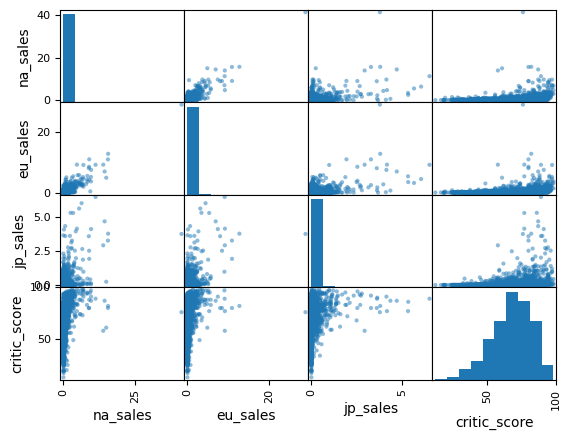

In [33]:
pd.plotting.scatter_matrix(games_leaders[['na_sales', 'eu_sales', 'jp_sales', 'critic_score']])
plt.show()

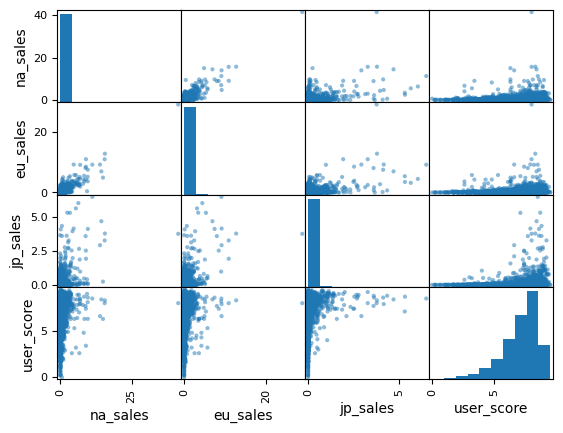

In [34]:
pd.plotting.scatter_matrix(games_leaders[['na_sales', 'eu_sales', 'jp_sales', 'user_score']])
plt.show()

Vemos una situación similar a la de la plataforma 'x360' pero en menor medida, pues hay más videojuegos que aunque tengan calificaciónes bajas, tuvieron buena cantidad en ventas, sin embargo, es más notable 

En el caso de las calificaciónes de los usuarios, no importaron significativamente, pues vemos unos cuántos videojuegos que aún teniendo calificaciones por debajo de 5, tuvieron ventas muy buenas.

Para el caso de las calificaciones de los profesionales, sólo vemos unos cuantos videojuegos que tuvieron buenas ventas, pero sólo cuándo tenían calificaciónes arriba de 50 puntos.

para la región de 'jp' es notorio que hay mayor cantidad de videojuegos que tienen considerables ventas buenas cuándo las calificaciónes (de profesionales y usuarios) son altas.

In [ ]:
# Crea una función que haga la prueba de Levene
def levene_test(s1, s2, center='mean'):
    levene = st.levene(s1, s2, center=center)
    return levene

### Las plataformas 'x360' y 'pc' tienen juegos similares, ¿Cómo serán las calificacines de los usuarios entre ambas plataformas?

H0 -> El promedio de las calificaciones de los usuarios probablemente son iguales.

H1 -> El promedio de las calificaciones de los usuarios probablemente son diferentes.

In [53]:
# Crea una variable que guarde las calificaciónes de la plataforma 'x360'
cal_x360 = games.query('platform == "x360" and ~user_score.isna()')['user_score']
# Crea una variable que guarde las calificaciónes de la plataforma 'pc'
cal_pc = games.query('platform == "pc" and ~user_score.isna()')['user_score']
# Aplicar la prueba de Levene para ver la igualdad de varianzas de nuestras muestras.
levene_test_plat = levene_test(cal_x360, cal_pc)
print(f'p-value de la prueba Levene: {levene_test_plat.pvalue}')
alpha = 0.05
if levene_test_plat.pvalue < alpha:
    equal_var = False
else:
    equal_var = True
# Prueba la hipótesis.
results_plat = st.ttest_ind(cal_x360, cal_pc, equal_var = equal_var)
print('p-value de la prueba T:', results_plat.pvalue)
if results_plat.pvalue < alpha:
    print("Rechazamos la hipótesis nula, la calificación promedio de los usuarios es distinta entre la plataformas.")
else:
    print("No rechazamos la hipótesis nula, la calificación promedio de los usuarios es igual entre la plataformas.")

p-value de la prueba Levene: 0.07118152011650035
p-value de la prueba T: 1.3412615061266987e-07
Rechazamos la hipótesis nula, la calificación promedio de los usuarios es distinta entre la plataformas.


### Las ventas de los videojuegos de género 'action' y 'sports' fueron las más altas, pero ¿Qué calificación les dieron los usuarios?

H0 -> El promedio de las calificaciones de los usuarios probablemente son iguales.

H1 -> El promedio de las calificaciones de los usuarios probablemente son diferentes.

In [56]:
# Crea una variable que guarde las calificaciónes del género 'action'
cal_action = games.query('genre == "action" and ~user_score.isna()')['user_score']
# Crea una variable que guarde las calificaciónes de la plataforma 'sport'
cal_sports = games.query('genre == "sports" and ~user_score.isna()')['user_score']
# Aplicar la prueba de Levene para ver la igualdad de varianzas de nuestras muestras.
levene_test_genres = levene_test(cal_action, cal_sports)
print(f'p-value de la prueba Levene: {levene_test_genres.pvalue}')
# Prueba la hipótesis
alpha = 0.05
if levene_test_genres.pvalue < alpha:
    equal_var = False
else:
    equal_var = True
results_genres = st.ttest_ind(cal_action, cal_sports, equal_var = equal_var)
print('p-value de la prueba T:', results_genres.pvalue)
if results_genres.pvalue < alpha:
    print("Rechazamos la hipótesis nula, la calificación promedio de los usuarios es distinta entre los géneros.")
else:
    print("No rechazamos la hipótesis nula, la calificación promedio de los usuarios es igual entre los géneros.")

p-value de la prueba Levene: 5.729053066161594e-06
p-value de la prueba T: 0.12024530426190533
No rechazamos la hipótesis nula, la calificación promedio de los usuarios es igual entre los géneros.


### Conclusiones.

- Vemos que los géneros más rentables son los de 'action' y 'sports'.
- Las plataformas tienen un margen de 6 años para un cambio generacional en su plataforma.
- Los videojuegos se venden de manera similar en las regiones de 'na' y 'eu', pero es diferente en la región de 'jp'.
- Las plataformas tienen en promedio la misma cantidad de ventas en sus videojuegos, lo que las diferencía son los videojuegos que tienen ventas considerablemente más altas que el resto, lo cuál "jala" a la plataforma para tener mayores ventas totales de la plataforma.
- Las calificaciones entre las plataformas 'x360' y 'pc' probablemente son diferentes, lo que podría decirnos que probablemente haya que mejorar los videojuegos en algún aspecto en una plataforma u otra.
- Las calificaciones entre los géneros más vendidos (action y sports) son probablemente iguales, lo que podría decirnos que entre los usuarios serían excelentes géneros a los cuáles apostar mayor empeño a la hora de desarrollar videojuegos, pues al final, el usuario es el consumidor.


